## Upload files from colab to drive

In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1S2wv__x_2ZNB2UM9CFXNfSsp-hpZCQ1p


## List Download file from drive

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Sample file.txt, id 1S2wv__x_2ZNB2UM9CFXNfSsp-hpZCQ1p
title Sample file.txt, id 1w21AEycm8zTF2ZPQV8kzuP3o0yVGZNQd
title Sample file.txt, id 1x_d92IV-ftKBXZLmhyGbMseEtmPYHwXI


In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1x_d92IV-ftKBXZLmhyGbMseEtmPYHwXI'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Sample upload file content"


## Pandas

In [0]:
import pandas as pd
data = pd.read_csv('mobile_cleaned.csv')

In [5]:
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [6]:
data.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,5.4,30,1,0,0,147.0,26,7,54900,15,2160,10,4,0,18.0,4,3,4,25,3,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,5.5,30,4,144,0,150.9,7,9,56900,27,2160,10,1,8,12.0,1,4,4,2,6,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,5.5,30,4,81,2,158.2,16,11,59000,24,2160,7,1,2,12.0,2,2,2,1,0,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,4.7,60,4,39,2,138.1,16,11,64500,14,1080,7,1,2,8.0,2,1,1,1,0,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,5.5,30,1,0,0,152.7,7,8,27999,40,2160,9,1,6,16.0,4,6,6,12,6,5,16,6,74.7,0.0,10,12,3000,2,0


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
print(data.columns)
print(data.shape)

Index(['sim_type', 'aperture', 'gpu_rank', 'weight', 'stand_by_time',
       'processor_frequency', 'thickness', 'flash_type',
       'front_camera_resolution', 'auto_focus', 'screen_size',
       'frames_per_second', 'FM', 'no_of_reviews_in_gsmarena_in_week', 'os',
       'phone_height', 'screen_protection', 'sim_size', 'price', 'talk_time',
       'video_resolution', 'display_resolution', 'removable_battery',
       'display_type', 'primary_camera_resolution', 'battery_type',
       'ram_memory', 'internal_memory', 'brand_rank', 'no_of_cores',
       'micro_sd_slot', 'screen_pixel_density', 'water_proof_rate',
       'phone_width', 'expandable_memory', 'version', 'usb_type',
       'battery_capacity', 'processor_rank', 'is_liked'],
      dtype='object')
(109, 40)


In [9]:
data.loc[5]

sim_type                                0.0
aperture                               14.0
gpu_rank                               55.0
weight                                179.0
stand_by_time                         280.0
processor_frequency                     1.3
thickness                               7.9
flash_type                              5.0
front_camera_resolution                 5.0
auto_focus                              3.0
screen_size                             5.5
frames_per_second                      30.0
FM                                      3.0
no_of_reviews_in_gsmarena_in_week       6.0
os                                      0.0
phone_height                          150.0
screen_protection                       5.0
sim_size                                3.0
price                                5999.0
talk_time                              22.0
video_resolution                      720.0
display_resolution                      0.0
removable_battery               

In [10]:
df = data[0:10]
print(df.shape)
print(df.head())

(10, 40)
   sim_type  aperture  gpu_rank  ...  battery_capacity  processor_rank  is_liked
0         0        12        55  ...              2000             125         1
1         0         1        55  ...              2000             165         1
2         0         9        55  ...              2500             164         0
3         0         8        55  ...              3000             165         1
4         1         1        55  ...              3000             165         0

[5 rows x 40 columns]


In [11]:
df_thin = df[['sim_type','gpu_rank']]
print(df_thin.shape)
print(df_thin.head())

(10, 2)
   sim_type  gpu_rank
0         0        55
1         0        55
2         0        55
3         0        55
4         1        55


In [12]:
df_liked = df[df['is_liked']==1]
print(df_liked.shape)

(7, 40)


In [13]:
df['price'].describe()

count      10.00000
mean     5634.00000
std      1034.93725
min      3870.00000
25%      5032.50000
50%      5994.50000
75%      6449.00000
max      6649.00000
Name: price, dtype: float64

In [14]:
df.describe()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.0,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,0.300000,6.300000,52.30000,164.100000,295.800000,1.260000,9.01000,5.0,2.12200,2.500000,4.800000,24.000000,2.900000,7.600000,0.0,144.850000,18.000000,3.200000,5634.00000,11.300000,768.000000,10.300000,2.500000,3.600000,6.204000,1.000000,52.400000,5.800000,12.100000,5.400000,4.0,5.500000,4.500000,73.380000,44.800000,5.300000,3.400000,2410.000000,142.10000,0.700000
std,0.483046,4.945256,5.96378,35.180329,87.551636,0.150555,1.36337,0.0,1.14249,1.080123,0.483046,7.745967,0.875595,12.650867,0.0,18.691486,9.741093,0.632456,1034.93725,5.143496,180.665437,6.549809,1.080123,3.921451,1.545799,0.471405,161.487667,2.097618,11.656662,1.897367,0.0,3.472111,1.581139,8.330773,30.914937,1.251666,1.264911,523.768397,30.94601,0.483046
min,0.000000,1.000000,41.00000,124.000000,182.000000,1.000000,7.90000,5.0,0.30000,0.000000,4.000000,15.000000,2.000000,0.000000,0.0,123.000000,4.000000,3.000000,3870.00000,6.000000,480.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,2.000000,4.000000,0.000000,4.0,1.000000,3.000000,62.500000,32.000000,2.000000,3.000000,1700.000000,92.00000,0.000000
25%,0.000000,1.000000,55.00000,144.500000,235.000000,1.300000,8.02500,5.0,2.00000,3.000000,4.625000,15.000000,2.250000,0.000000,0.0,132.225000,8.250000,3.000000,5032.50000,9.000000,720.000000,4.000000,3.000000,2.000000,5.000000,1.000000,1.000000,5.500000,4.000000,6.000000,4.0,2.500000,3.000000,68.600000,32.000000,5.000000,3.000000,2000.000000,125.00000,0.250000
50%,0.000000,8.000000,55.00000,154.500000,290.000000,1.300000,8.35000,5.0,2.00000,3.000000,5.000000,30.000000,3.000000,2.500000,0.0,143.800000,22.000000,3.000000,5994.50000,9.500000,720.000000,13.000000,3.000000,2.000000,5.020000,1.000000,1.000000,7.000000,4.000000,6.000000,4.0,5.500000,4.500000,72.200000,32.000000,6.000000,3.000000,2250.000000,163.50000,1.000000
75%,0.750000,8.750000,55.00000,173.000000,371.000000,1.300000,10.07500,5.0,2.00000,3.000000,5.000000,30.000000,3.000000,6.000000,0.0,149.375000,26.000000,3.000000,6449.00000,11.000000,720.000000,15.750000,3.000000,2.000000,8.000000,1.000000,2.000000,7.000000,23.000000,6.000000,4.0,9.000000,6.000000,77.275000,32.000000,6.000000,3.000000,2975.000000,165.00000,1.000000
max,1.000000,14.000000,56.00000,234.000000,435.000000,1.500000,11.60000,5.0,5.00000,3.000000,5.500000,30.000000,5.000000,39.000000,0.0,179.000000,26.000000,5.000000,6649.00000,22.000000,1080.000000,17.000000,3.000000,11.000000,8.000000,2.000000,512.000000,7.000000,30.000000,6.000000,4.0,9.000000,6.000000,91.000000,128.000000,6.000000,7.000000,3000.000000,165.00000,1.000000


In [15]:
df[df['is_liked']==1]['price'].mean()

5653.428571428572

In [16]:
g=df.groupby(['is_liked'])
for key,df_key in g:
  print(key)
  print(df_key)

0
   sim_type  aperture  gpu_rank  ...  battery_capacity  processor_rank  is_liked
2         0         9        55  ...              2500             164         0
4         1         1        55  ...              3000             165         0
5         0        14        55  ...              2900             165         0

[3 rows x 40 columns]
1
   sim_type  aperture  gpu_rank  ...  battery_capacity  processor_rank  is_liked
0         0        12        55  ...              2000             125         1
1         0         1        55  ...              2000             165         1
3         0         8        55  ...              3000             165         1
6         1         1        56  ...              1700             163         1
7         0         8        41  ...              2000              92         1
8         1         8        41  ...              2000              92         1
9         0         1        55  ...              3000             125         1



In [17]:
g.mean()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank
is_liked,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.333333,8.000000,55.000000,185.000000,331.333333,1.366667,8.1,5.0,2.973333,3.000000,5.166667,25.000000,2.666667,8.666667,0.0,158.166667,9.000000,3.000000,5588.666667,14.333333,840.000000,7.000000,2.000000,1.333333,6.013333,1.333333,1.000000,7.000000,11.666667,6.000000,4.0,5.666667,5.000000,78.0,32.000000,6.0,3.000000,2800.000000,164.666667
1,0.285714,5.571429,51.142857,155.142857,280.571429,1.214286,9.4,5.0,1.757143,2.285714,4.642857,23.571429,3.000000,7.142857,0.0,139.142857,21.857143,3.285714,5653.428571,10.000000,737.142857,11.714286,2.714286,4.571429,6.285714,0.857143,74.428571,5.285714,12.285714,5.142857,4.0,5.428571,4.285714,71.4,50.285714,5.0,3.571429,2242.857143,132.428571


In [18]:
g['price'].mean()

is_liked
0    5588.666667
1    5653.428571
Name: price, dtype: float64

In [19]:
g['price'].describe()

,count,mean,std,min,25%,50%,75%,max
is_liked,,,,,,,,
0,3.0,5588.666667,702.938357,4777.0,5383.5,5990.0,5994.5,5999.0
1,7.0,5653.428571,1200.194687,3870.0,4929.0,5999.0,6599.0,6649.0


In [20]:
g[['price','weight']].describe()

price                                    ... weight                     
         count         mean          std     min  ...    25%    50%    75%    max
is_liked                                          ...                            
0          3.0  5588.666667   702.938357  4777.0  ...  160.5  179.0  206.5  234.0
1          7.0  5653.428571  1200.194687  3870.0  ...  142.0  154.0  155.0  214.0

[2 rows x 16 columns]

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


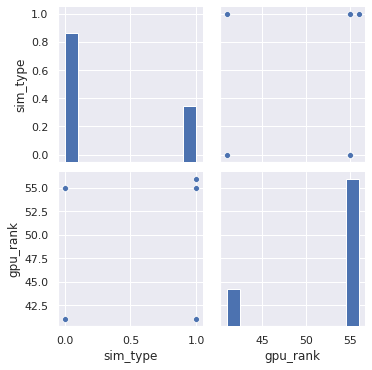

In [22]:
sns.set()
ax = sns.pairplot(df_thin,diag_kind='hist')

## Debugging

In [0]:
def factorial(x):
  if(x<=1):
    return 1
  else:
    return x * factorial(x-1)

In [24]:
factorial(5)

120

In [0]:
import numpy as np
def code_to_debug():
  for i in range(10):
    x = np.random.random()
    factorial(x)

In [0]:
code_to_debug()

In [0]:
def code_to_debug():
  #import pdb; pdb.set_trace();
  for i in range(10):
    x = np.random.random()
    factorial(x)

In [0]:
code_to_debug()

## Plot Vectors

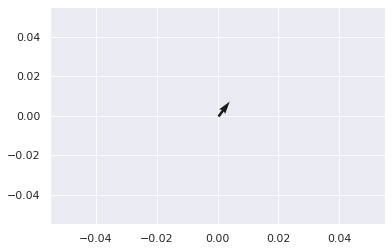

In [30]:
plt.quiver(0,0,3,4)
plt.show()

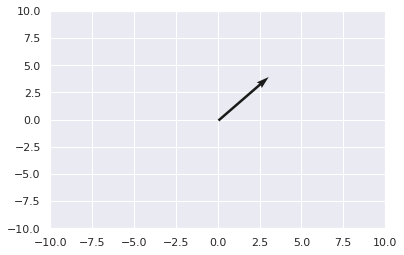

In [32]:
plt.quiver(0,0,3,4,scale_units='xy',angles='xy',scale=1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

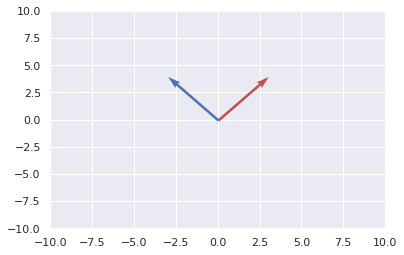

In [34]:
plt.quiver(0,0,3,4,scale_units='xy',angles='xy',scale=1,color='r')
plt.quiver(0,0,-3,4,scale_units='xy',angles='xy',scale=1,color='b')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [0]:
def plot_vectors(vecs):
  colors = ['r','g','b','y']
  i = 0
  for vec in vecs:
    plt.quiver(vec[0],vec[1],vec[2],vec[3],scale_units='xy',angles='xy',scale=1,color=colors[i%len(colors)])
    i+=1
  plt.xlim(-10,10)
  plt.ylim(-10,10)
  plt.show()

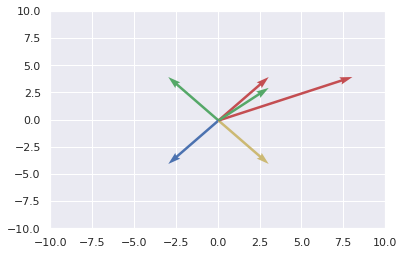

In [50]:
plot_vectors([(0,0,3,4),(0,0,-3,4),(0,0,-3,-4),(0,0,3,-4),(0,0,8,4),(0,0,3,3)])

## Vector Addition and Subtraction

In [0]:
vecs = [np.asarray([0,0,3,4]),np.asarray([0,0,-3,4]),np.asarray([0,0,-3,-4]),np.asarray([0,0,3,-4])]

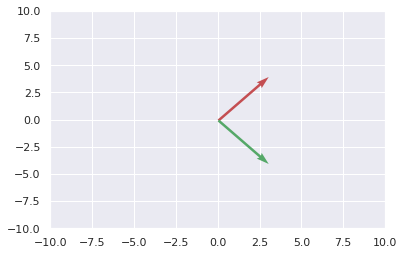

In [56]:
plot_vectors([vecs[0],vecs[3]])

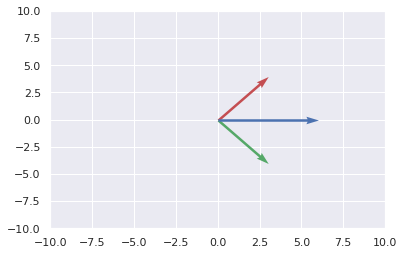

In [57]:
sum = vecs[0]+vecs[3]
plot_vectors([vecs[0],vecs[3],sum])

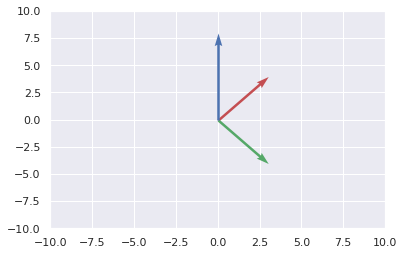

In [58]:
diff = vecs[0]-vecs[3]
plot_vectors([vecs[0],vecs[3],diff])

## Vector Dot Product

In [60]:
np.dot(vecs[0],vecs[3])

-7

In [64]:
np.dot(vecs[0],vecs[3])/np.linalg.norm(vecs[3])

-1.4

In [0]:
``